In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv("framingham.csv")

In [ ]:
dataset.shape

(4240, 16)

In [ ]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
	dataset.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


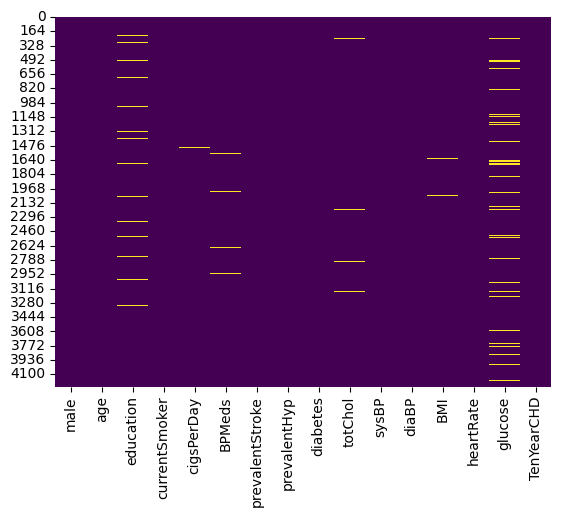

In [ ]:
print(dataset.isnull().sum())
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
dataset['glucose'] = dataset['glucose'].fillna(dataset['glucose'].mean())
dataset['education'] = dataset['education'].fillna(dataset['education'].mode()[0])
dataset['BPMeds'] = dataset['BPMeds'].fillna(dataset['BPMeds'].mode()[0])
dataset['totChol'] = dataset['totChol'].fillna(dataset['totChol'].mean())
dataset['cigsPerDay'] = dataset['cigsPerDay'].fillna(dataset['cigsPerDay'].mean())
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mean())
dataset['heartRate'] = dataset['heartRate'].fillna(dataset['heartRate'].mean())

In [ ]:
print(dataset.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


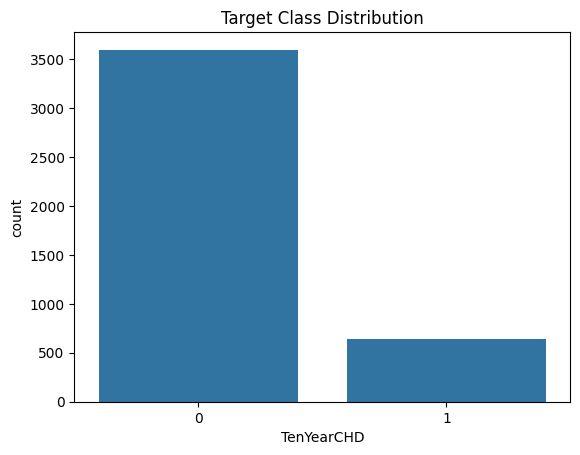

In [ ]:
sns.countplot(x='TenYearCHD', data=dataset)
plt.title("Target Class Distribution")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
X = dataset.drop('TenYearCHD', axis=1)
y = dataset['TenYearCHD']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)



In [ ]:
from collections import Counter

print(Counter(y))  # Before SMOTE
print(Counter(y_resampled))  # After SMOTE

Counter({0: 3596, 1: 644})
Counter({0: 3596, 1: 3596})


In [ ]:
from collections import Counter
target_temp = Counter(y_resampled)
total_records = sum(target_temp.values())
print("Percentage of patients without heart problems: " + str(round(target_temp[0] * 100 / total_records, 2)))
print("Percentage of patients with heart problems: " + str(round(target_temp[1] * 100 / total_records, 2)))

Percentage of patients without heart problems: 50.0
Percentage of patients with heart problems: 50.0


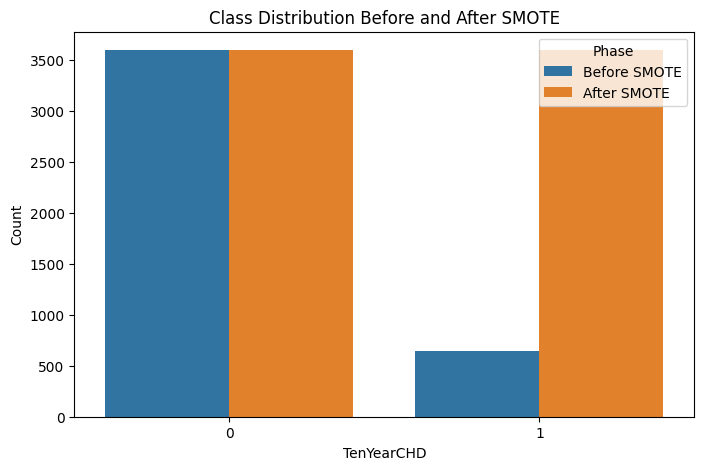

In [ ]:
original_counts = Counter(y)
resampled_counts = Counter(y_resampled)
df_plot = pd.DataFrame({
    'Class': ['0', '1'],
    'Before SMOTE': [original_counts[0], original_counts[1]],
    'After SMOTE': [resampled_counts[0], resampled_counts[1]]
})
df_melted = df_plot.melt(id_vars='Class', var_name='Phase', value_name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x='Class', y='Count', hue='Phase')
plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

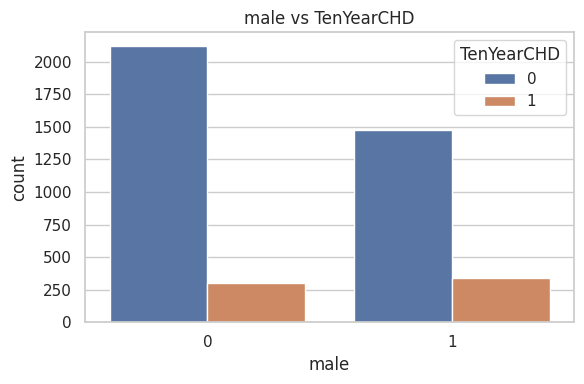

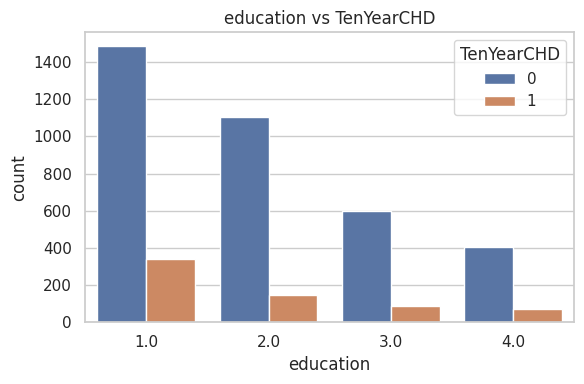

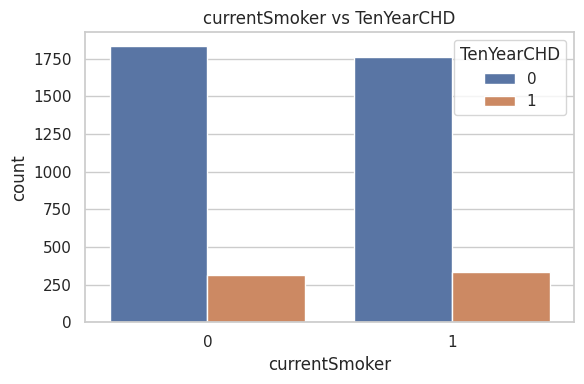

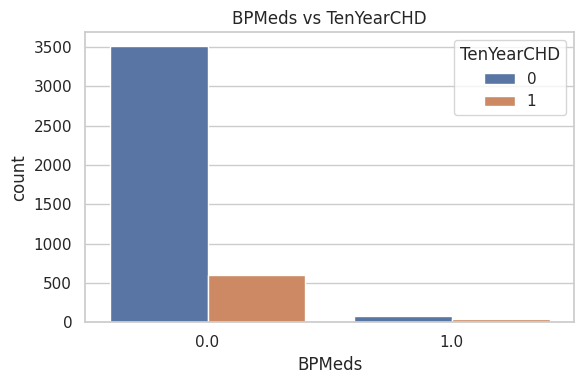

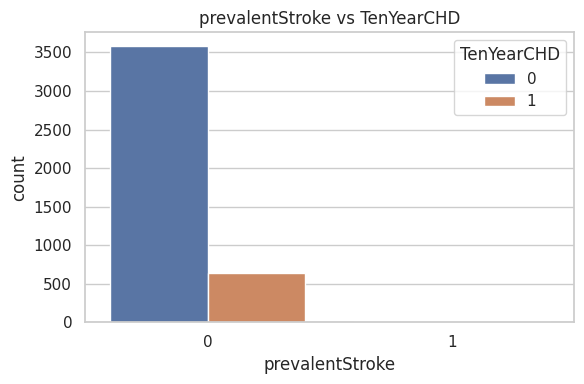

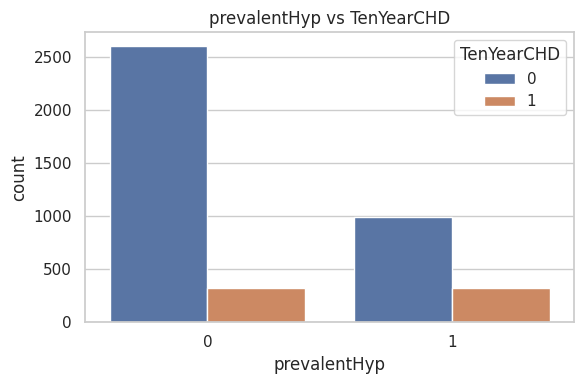

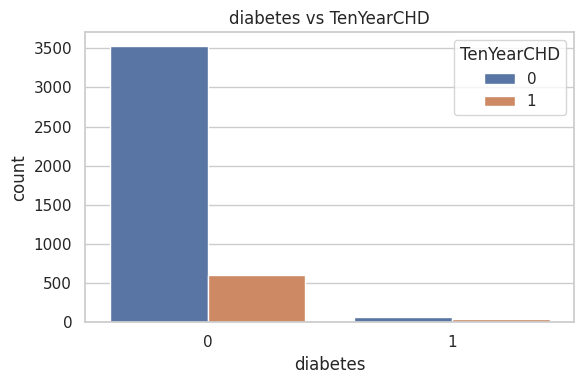

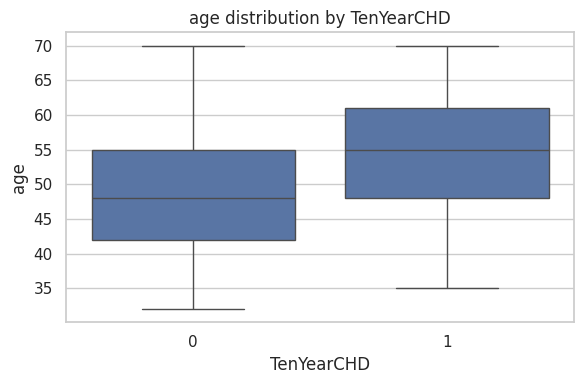

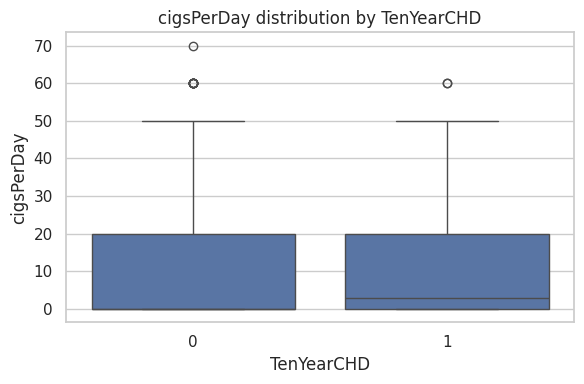

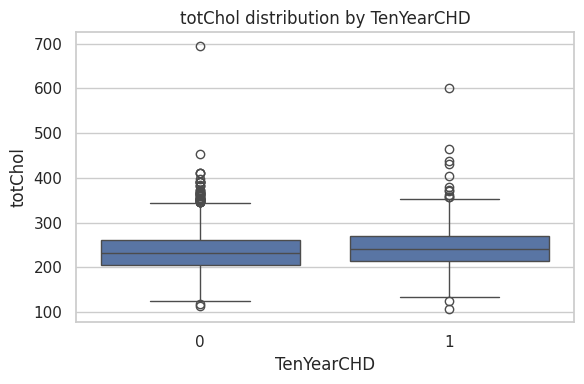

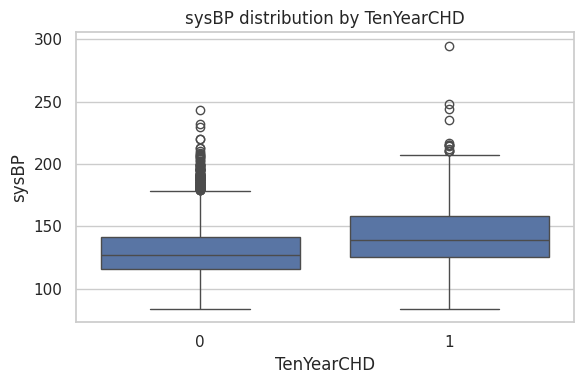

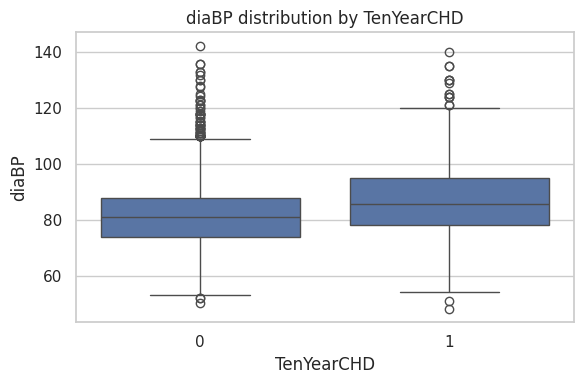

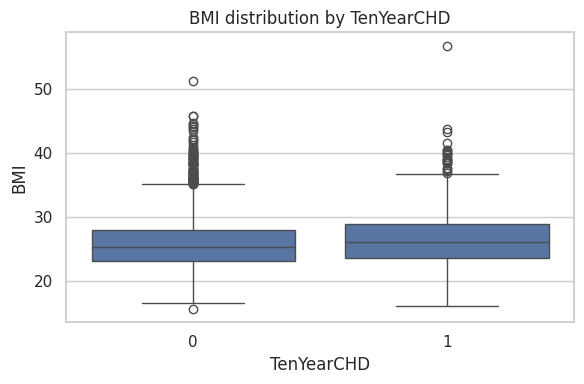

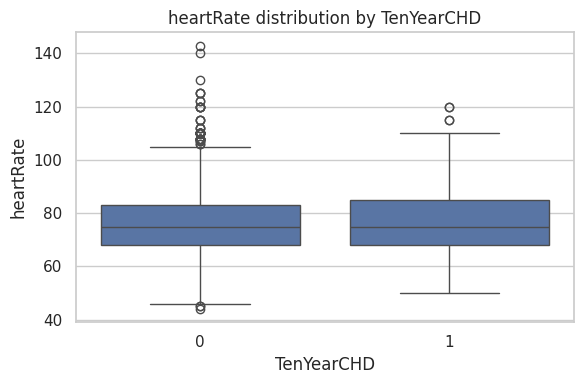

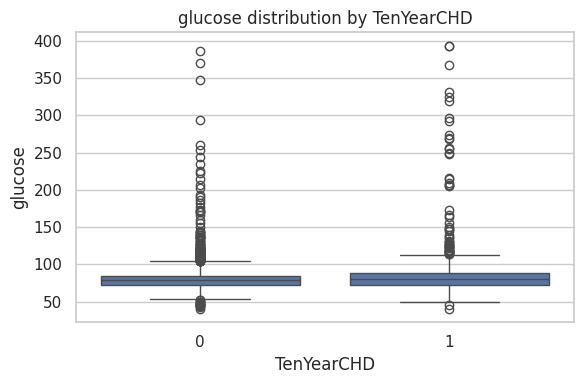

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds',
                        'prevalentStroke', 'prevalentHyp', 'diabetes']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='TenYearCHD')
    plt.title(f'{col} vs TenYearCHD')
    plt.legend(title='TenYearCHD')
    plt.tight_layout()
    plt.show()

continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP',
                       'diaBP', 'BMI', 'heartRate', 'glucose']

for col in continuous_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='TenYearCHD', y=col)
    plt.title(f'{col} distribution by TenYearCHD')
    plt.tight_layout()
    plt.show()


<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


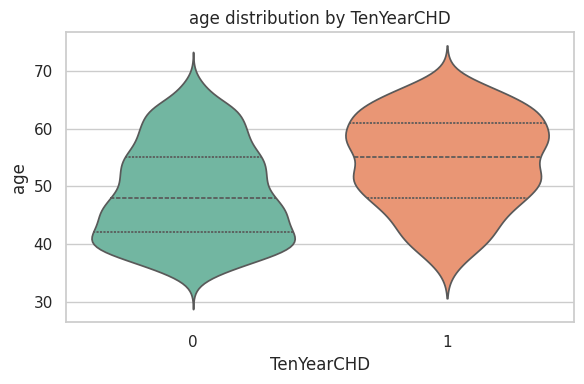

<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


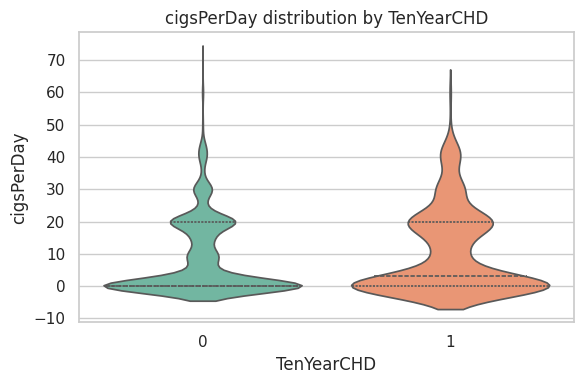

<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


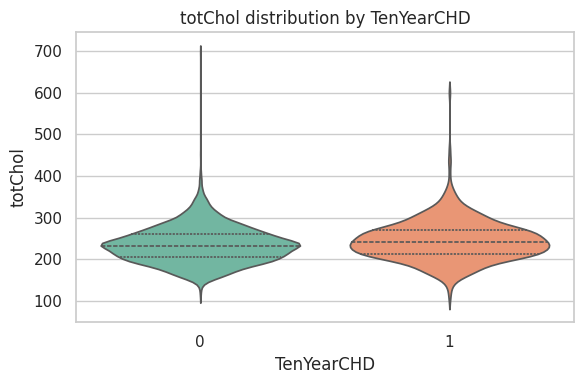

<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


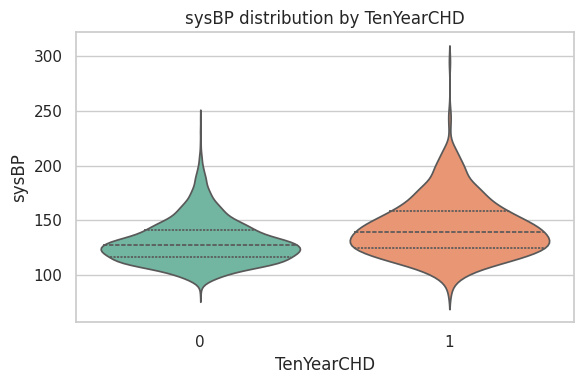

<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


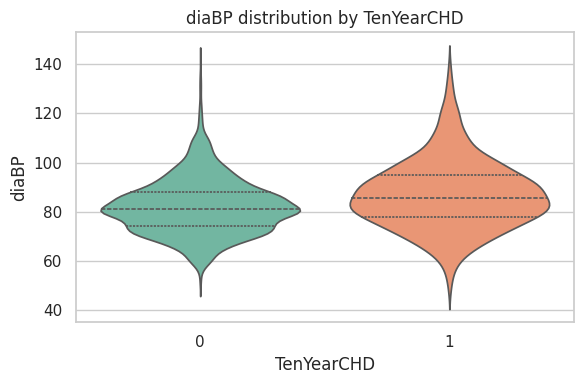

<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


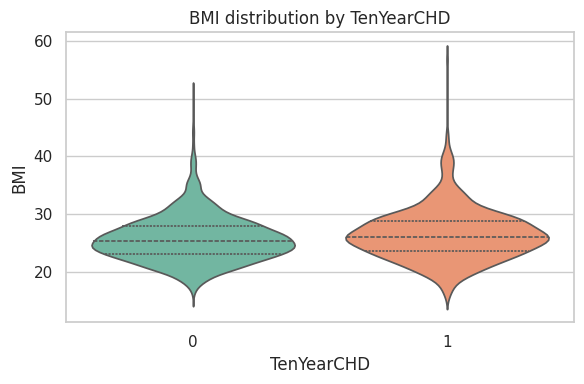

<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


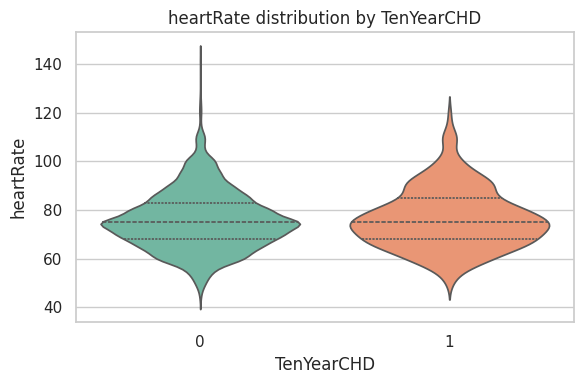

<ipython-input-17-3293cc477955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')


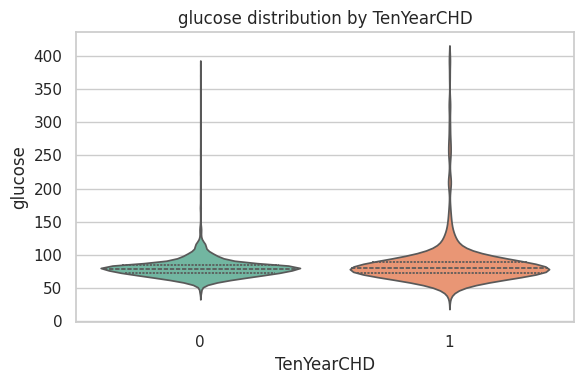

In [ ]:
for col in ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=df, x='TenYearCHD', y=col, inner='quartile', palette='Set2')
    plt.title(f'{col} distribution by TenYearCHD')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


predictors = X_resampled
target = y_resampled

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5753, 15)
(1439, 15)
(5753,)
(1439,)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)

Y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'class_weight': ['balanced', None]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)

best_lr = grid_search.best_estimator_
Y_pred_lr = best_lr.predict(X_test_scaled)

score_lr = round(accuracy_score(Y_test, Y_pred_lr) * 100, 2)
print("The accuracy score achieved using Logistic Regression is: " + str(score_lr) + " %")


The accuracy score achieved using Logistic Regression is: 67.62 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(probability=True),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

results = {}

for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{clf_name} Accuracy: {accuracy:.4f}")

    print(f"Classification Report for {clf_name}:")
    print(classification_report(Y_test, Y_pred))

    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(Y_test, Y_pred))
    print("="*50)


RandomForestClassifier Accuracy: 0.9013
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       745
           1       0.90      0.89      0.90       694

    accuracy                           0.90      1439
   macro avg       0.90      0.90      0.90      1439
weighted avg       0.90      0.90      0.90      1439

Confusion Matrix for RandomForestClassifier:
[[679  66]
 [ 76 618]]
AdaBoostClassifier Accuracy: 0.7846
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       745
           1       0.78      0.77      0.78       694

    accuracy                           0.78      1439
   macro avg       0.78      0.78      0.78      1439
weighted avg       0.78      0.78      0.78      1439

Confusion Matrix for AdaBoostClassifier:
[[595 150]
 [160 534]]
GradientBoostingClassifier Accuracy: 0.847

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Accuracy: 0.8951
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       745
           1       0.92      0.85      0.89       694

    accuracy                           0.90      1439
   macro avg       0.90      0.89      0.89      1439
weighted avg       0.90      0.90      0.89      1439

Confusion Matrix for XGBClassifier:
[[697  48]
 [103 591]]


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(probability=True),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

results = []

for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']

    results.append({
        'Model': clf_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall
    })

results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:00:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                        Model  Accuracy  F1-Score  Precision    Recall
0      RandomForestClassifier  0.907575  0.907544   0.907620  0.907575
1          AdaBoostClassifier  0.784573  0.784509   0.784521  0.784573
2  GradientBoostingClassifier  0.847811  0.846852   0.852824  0.847811
3          LogisticRegression  0.676859  0.676932   0.678000  0.676859
4                         SVC  0.745657  0.745622   0.747850  0.745657
5        KNeighborsClassifier  0.772759  0.770085   0.793443  0.772759
6      DecisionTreeClassifier  0.794302  0.794307   0.796232  0.794302
7                  GaussianNB  0.602502  0.590433   0.608640  0.602502
8               XGBClassifier  0.895066  0.894769   0.897116  0.895066


In [ ]:
import numpy as np

def predict(model, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose):

    male_encoded = 1 if male.lower() == "male" else 0
    currentSmoker_encoded = 1 if currentSmoker.lower() == "yes" else 0
    BPMeds_encoded = 1 if BPMeds.lower() == "yes" else 0
    prevalentStroke_encoded = 1 if prevalentStroke.lower() == "yes" else 0
    prevalentHyp_encoded = 1 if prevalentHyp.lower() == "yes" else 0
    diabetes_encoded = 1 if diabetes.lower() == "yes" else 0


    features = np.array([[male_encoded, age, currentSmoker_encoded, cigsPerDay, BPMeds_encoded, prevalentStroke_encoded, prevalentHyp_encoded, diabetes_encoded, totChol, sysBP, diaBP, BMI, heartRate, glucose]])


    scaled_features = scaler.transform(features)

    result = model.predict(scaled_features)

    return result[0]

In [ ]:
import numpy as np

def predict_chd(lr, scaler, male, age, education, currentSmoker, cigsPerDay, BPMeds,
                prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP,
                BMI, heartRate, glucose):


    gender = 1 if male.lower() == 'male' else 0
    smoker = 1 if currentSmoker.lower() == 'yes' else 0
    bp_meds = 1 if BPMeds.lower() == 'yes' else 0
    stroke = 1 if prevalentStroke.lower() == 'yes' else 0
    hyp = 1 if prevalentHyp.lower() == 'yes' else 0
    diab = 1 if diabetes.lower() == 'yes' else 0


    input_data = np.array([[gender, age, education, smoker, cigsPerDay, bp_meds,
                            stroke, hyp, diab, totChol, sysBP, diaBP,
                            BMI, heartRate, glucose]])


    input_scaled = scaler.transform(input_data)


    prediction = lr.predict(input_scaled)

    return prediction[0]


In [ ]:
pred = predict_chd(lr, scaler, 'male', 54, 3, 'yes', 15, 'no', 'no', 'yes', 'no',
                   230, 140, 90, 26.4, 75, 95)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(pred)

0


In [ ]:

male = "female"
age = 56.00
education = 3
currentSmoker = "yes"
cigsPerDay = 3.00
BPMeds = "no"
prevalentStroke = "no"
prevalentHyp = "yes"
diabetes = "no"
totChol = 285.00
sysBP = 145.00
diaBP = 100.00
BMI = 30.14
heartRate = 80.00
glucose = 86.00

prediction = predict_chd(
    lr, scaler,
    male, age, education, currentSmoker, cigsPerDay,
    BPMeds, prevalentStroke, prevalentHyp, diabetes,
    totChol, sysBP, diaBP, BMI, heartRate, glucose
)

print("Predicted CHD risk (1 = high risk):", prediction)


Predicted CHD risk (1 = high risk): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns


RandomForestClassifier Accuracy: 0.9034

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       745
           1       0.90      0.90      0.90       694

    accuracy                           0.90      1439
   macro avg       0.90      0.90      0.90      1439
weighted avg       0.90      0.90      0.90      1439

Confusion Matrix for RandomForestClassifier:
[[676  69]
 [ 70 624]]
AdaBoostClassifier Accuracy: 0.7846

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       745
           1       0.78      0.77      0.78       694

    accuracy                           0.78      1439
   macro avg       0.78      0.78      0.78      1439
weighted avg       0.78      0.78      0.78      1439

Confusion Matrix for AdaBoostClassifier:
[[595 150]
 [160 534]]
GradientBoostingClassifier Accuracy: 0.8

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:01:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Accuracy: 0.8951

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       745
           1       0.92      0.85      0.89       694

    accuracy                           0.90      1439
   macro avg       0.90      0.89      0.89      1439
weighted avg       0.90      0.90      0.89      1439

Confusion Matrix for XGBClassifier:
[[697  48]
 [103 591]]


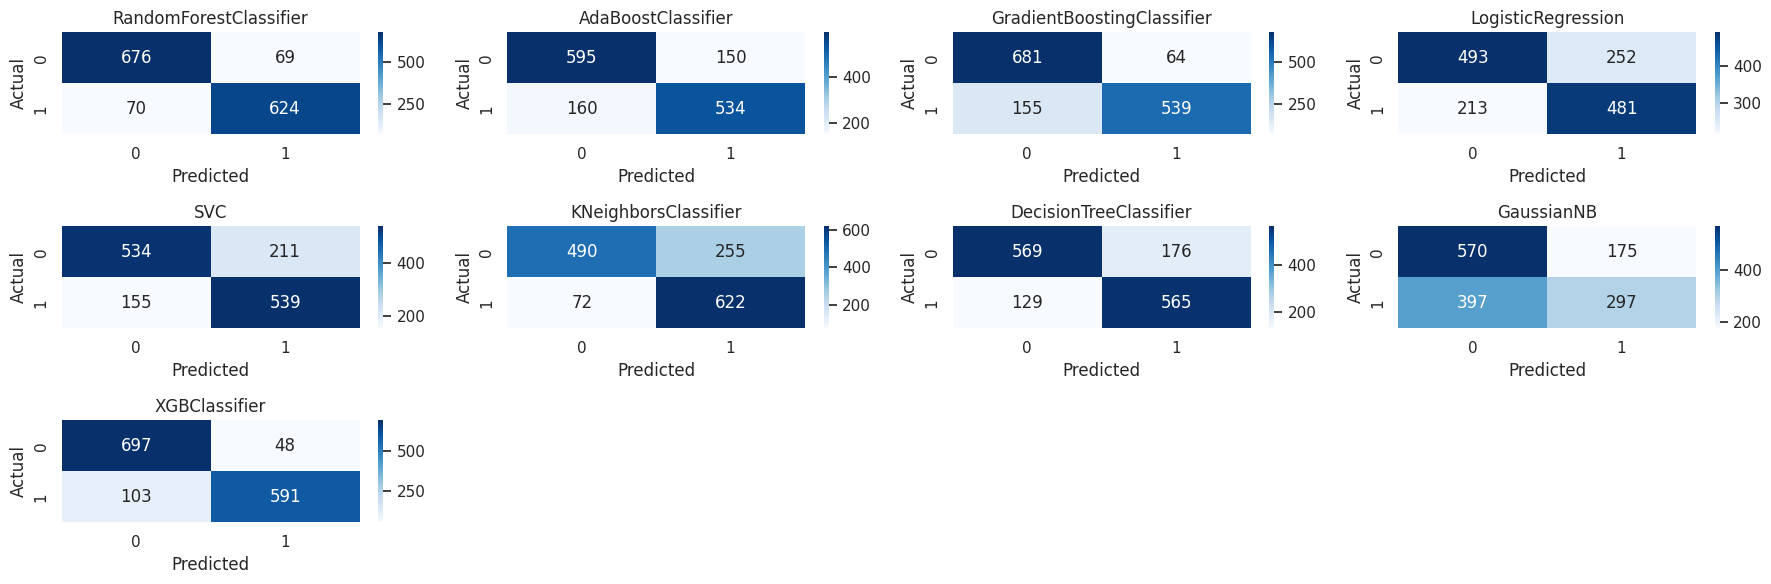

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

plt.figure(figsize=(18, 6))
plt_idx = 1

for i, clf in enumerate(classifiers):
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)

    acc = accuracy_score(Y_test, Y_pred)
    print(f"{clf_name} Accuracy: {acc:.4f}")

    print(f"\nClassification Report for {clf_name}:")
    print(classification_report(Y_test, Y_pred))

    cm = confusion_matrix(Y_test, Y_pred)
    print(f"Confusion Matrix for {clf_name}:")
    print(cm)
    print("=" * 50)

    plt.subplot(3, 4, plt_idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt_idx += 1

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:01:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


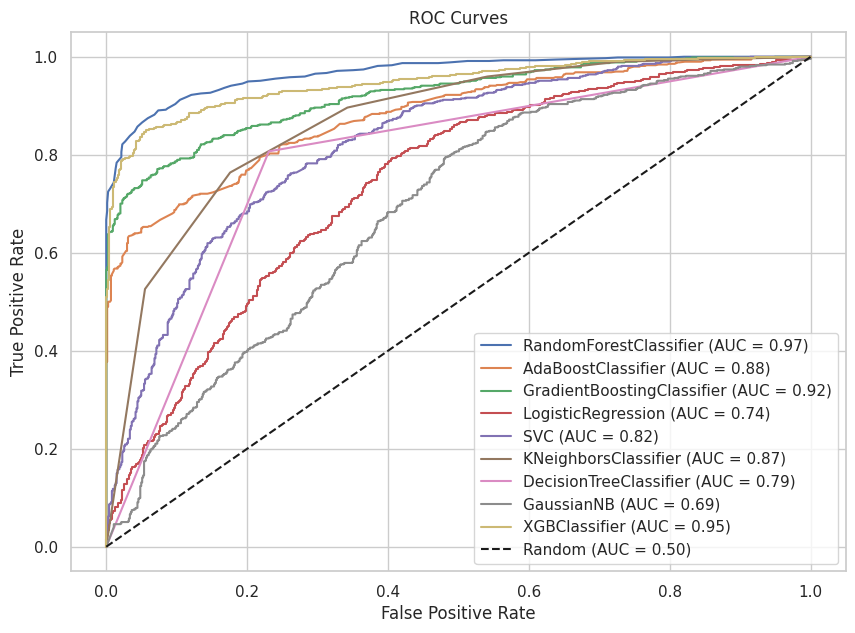

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for i, clf in enumerate(classifiers):
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, Y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = clf.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


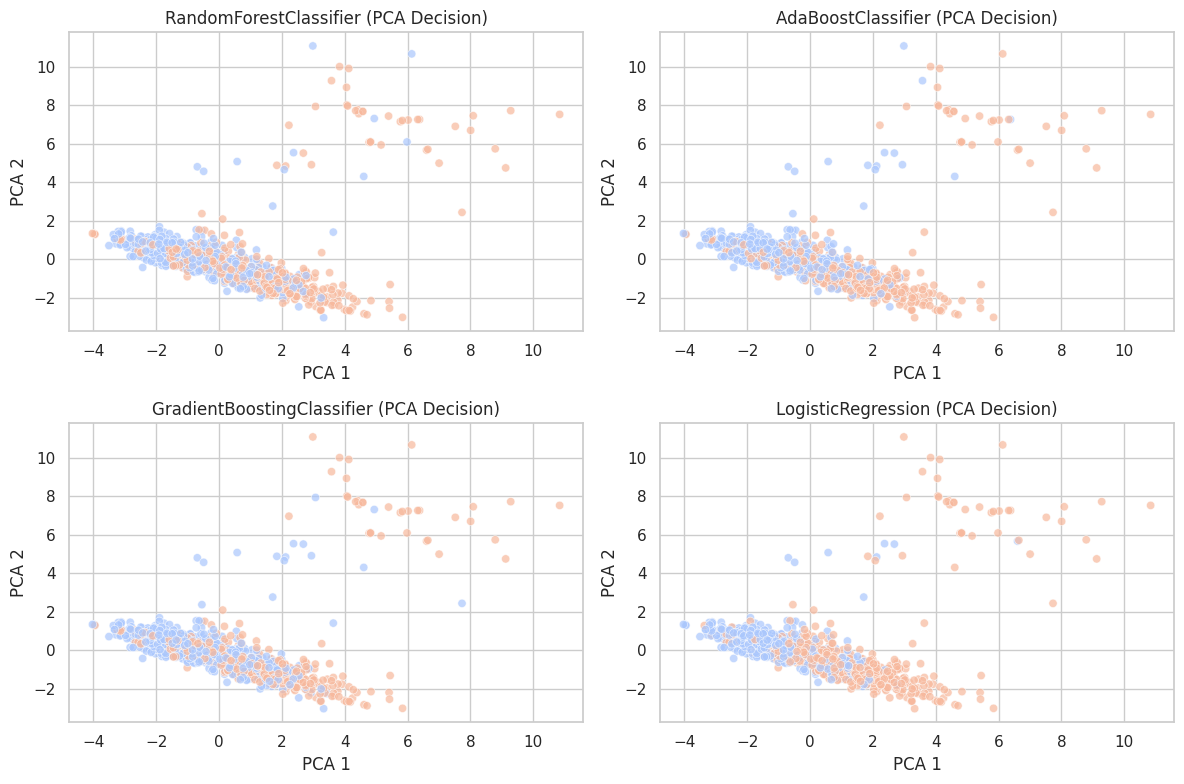

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test_scaled)


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, clf in enumerate(classifiers[:4]):
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)

    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=Y_pred, palette='coolwarm', alpha=0.7, legend=False)
    plt.title(f"{clf_name} (PCA Decision)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:02:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


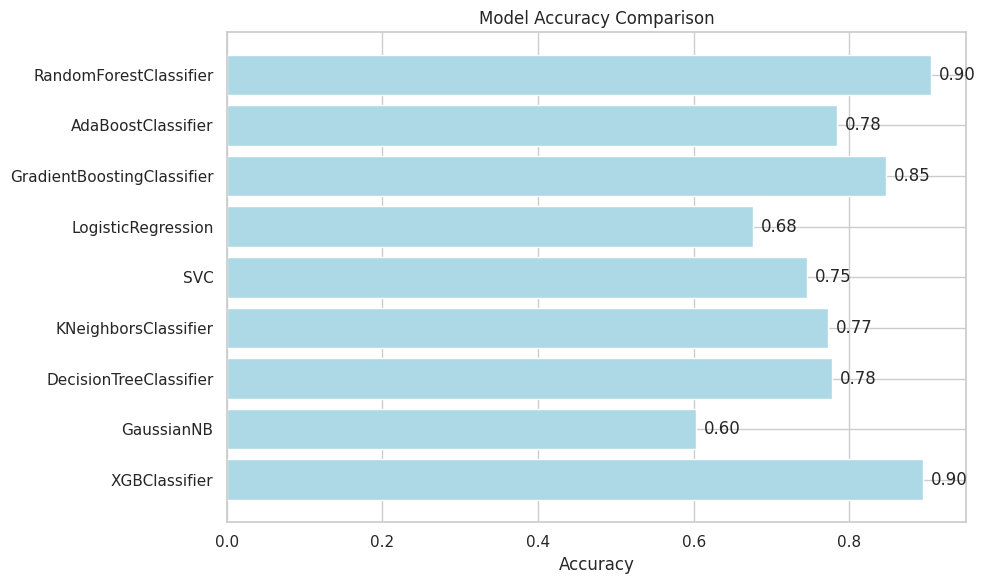

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model_names = []
accuracies = []

for clf in classifiers:
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)
    model_names.append(clf.__class__.__name__)
    accuracies.append(accuracy_score(Y_test, Y_pred))

plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color='lightblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()


for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


In [ ]:

best_model = None
best_accuracy = 0

for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, Y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf


import pickle
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


print(f"Saved {best_model.__class__.__name__} with accuracy: {best_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:04:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved RandomForestClassifier with accuracy: 0.9083
